In [1]:
from glycan import glycan
from read_functions_scaled import *
from glycan._prepare import normalize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data
numberedExcel = read_H3N2_data()

# Normalize the data
t = normalize(numberedExcel)

For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header


/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A v

In [3]:
# Create separate data frames for each glycan type
lac = t[t.GlycType == 'Lac']
twoThree = t[t.GlycType == '2-3 SiaLac']
twoSix = t[t.GlycType == '2-6 SiaLac']

In [4]:
# Function that returns a histogram of desired number of bins, given an array
def getHist(arr, bins=100):
    hist = np.histogram(arr, bins=bins)
    xVals = hist[1][:-1]
    yVals = hist[0] * 1.0/np.max(hist[0])
    return xVals, yVals

In [5]:
# Create histogram of (scaled) mean viral fluorescence, for each glycan type
lacX, lacY = getHist(lac.MVF_norm, bins=100)
twoThreeX, twoThreeY = getHist(twoThree.MVF_norm, bins=100)
twoSixX, twoSixY = getHist(twoSix.MVF_norm, bins=100)

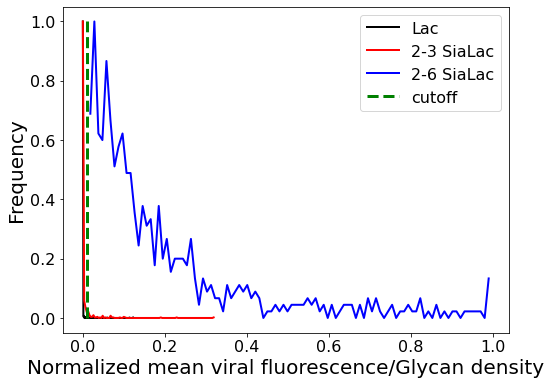

In [6]:
# Make the plot
# Then choose cutoff by visual inspection
# Represent the cutoff by a dotted line
# Save the plot

plt.figure(figsize=(8,6))
plt.plot(lacX, lacY, color='k', lw=2, label='Lac')
plt.plot(twoThreeX, twoThreeY, color='r', lw=2, label='2-3 SiaLac')
plt.plot(twoSixX, twoSixY, color='b', lw=2, label='2-6 SiaLac')

#plt.legend(bbox_to_anchor=(1.0,0.5), fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Normalized mean viral fluorescence/Glycan density", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
#plt.gcf().subplots_adjust(right=0.9)

tx = 0.01 * np.ones(11)
ty = np.arange(0.0,1.1, 0.1)

plt.plot(tx, ty, lw=3, ls='--', color='g', label='cutoff')
plt.legend(fontsize=16)

plt.savefig("Plots/SelectingCutoff_scaledMVD_H3N2.pdf")
plt.show()

In [7]:
toSave = t.reset_index(drop=True)
toSave['Experiment'] = pd.Series(['Non-binder']).repeat(toSave.shape[0]).reset_index()[0]
toSave.loc[(toSave.MVF_norm > 0.01), 'Experiment'] = 'Binder'
toSave.to_csv("Results/H3N2_EGG_all.csv", index=False)